**第一次课程作业**

**一、作业说明**

**任务：**编写一个钱币定位系统，其不仅能够检测出输入图像中各个钱币的边缘，同时，还能给出各个钱币的圆心坐标与半径。

**代码撰写说明：**
- 代码可以使用C++或者python语言进行编写，推荐使用python。
- 可直接调用Opencv的Canny与HoughCircle算法完成系统设计。
- 推荐自主实现Canny与Hough算法，此为加分项最高可加20分

**设计文档撰写说明：**

介绍算法整体流程，各个函数的功能说明，函数的输入参数说明，给出最终拟合结果图，分析各个参数对于最终定位结果的影响。 

**提交说明：**

4月6号前，提交zip格式压缩包（包含可运行代码一份、不超过2页的PDF格式实验设计文档一份）给学委，然后请学委收起后直接拷贝给我。非智能专业的选修同学请直接发到machinevision_bupt@163.com邮箱。

注意：压缩包务必采用“学号_姓名_第一次作业.zip”命名方式。

**二、评分标准**

**实验报告 40分**
1. 文档充实性 30分

算法流程描述十分清晰；各个函数的功能说明是否完整；函数参数介绍及分析是否全面；实验结果展示是否准确。

2. 文档可阅读性 10分

文字图片安排是否合理；整体编排布局是否整齐大方。

**代码60分**

1. 准确的实现任务目标 50分
2. 变量名清晰，代码逻辑性和可阅读性强 10分

**额外加分项 20分**

1. 自行编写Canny模块实现边缘功能提取者加10分
2. 自行编写HoughCircle模块实现圆形拟合功能者加10分

*注:抄袭者一旦发现，按0分处理*


In [1]:
%pylab inline
import cv2  # 导入opencv库

img = cv2.imread("q.jpg")  # 读取一张图片

Populating the interactive namespace from numpy and matplotlib


In [2]:
def coin_imshow(img):
    cv2.imshow("Coin", img)  # 显示图片
    cv2.waitKey(0)  # 窗口等待任意键盘按键输入，0为一直等待
    cv2.destroyAllWindows()  # 销毁窗口，退出程序

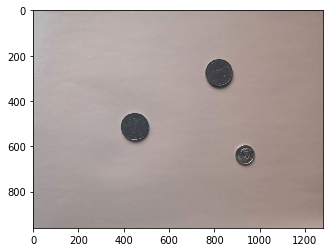

(960, 1280, 3)


In [3]:
plt.imshow(img)
plt.show()
print(img.shape)

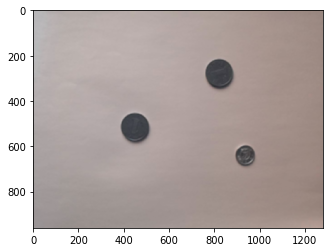

(960, 1280, 3)


In [4]:
img_blur = cv2.blur(img, (8, 8))  # 降噪处理
plt.imshow(img_blur)
plt.show()
print(img_blur.shape)

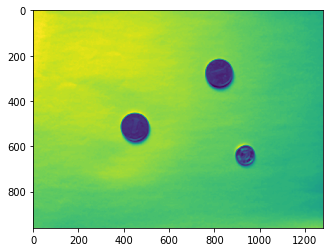

(960, 1280)


In [5]:
img_gray = cv2.cvtColor(img_blur, cv2.COLOR_BGR2GRAY)  # 灰度化
plt.imshow(img_gray)
plt.show()
print(img_gray.shape)

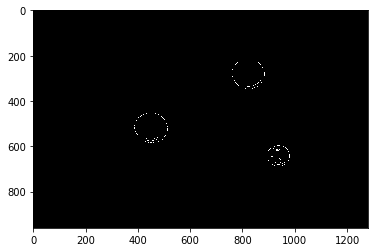

In [6]:
# 调参
param1 = 69
img_canny = cv2.Canny(img_gray, param1 / 2, param1)
plt.imshow(img_canny, cmap='gray',aspect='auto')
plt.show()

In [7]:
circles = cv2.HoughCircles(img_gray,
                           cv2.HOUGH_GRADIENT,
                           1,
                           50,
                           param1=69,
                           param2=30)

print(circles)
circles = circles[0]
print(circles)

[[[821.5 275.5  59.8]
  [449.5 517.5  63.9]
  [938.5 638.5  41.4]]]
[[821.5 275.5  59.8]
 [449.5 517.5  63.9]
 [938.5 638.5  41.4]]


In [8]:
from matplotlib.patches import Circle


def CoinPositioning(img,
                    hc_minDist=img.shape[0] / 10,
                    hc_param1=69,
                    hc_param2=59,
                    canny=False):
    img_blur = cv2.blur(img, (8, 8))  # 降噪处理，中值滤波(8,8)的效果很好
    img_gray = cv2.cvtColor(img_blur, cv2.COLOR_BGR2GRAY)  # 灰度化

    if canny:
        img_canny = cv2.Canny(img_gray, hc_param1 / 2, hc_param1)
        cv2.namedWindow('canny', cv2.WINDOW_AUTOSIZE)
        cv2.imshow('canny', img_canny)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

    circles = cv2.HoughCircles(img_gray,
                               cv2.HOUGH_GRADIENT,
                               1,
                               minDist=hc_minDist,
                               param1=hc_param1,
                               param2=hc_param2)
    print(circles)
    if circles is not None:
        circles = circles[0]

        fig = plt.figure()
        ax = fig.add_subplot(111)

        for circle in circles:
            cir = Circle(circle[:2], circle[2], fill=False, color="r")
            ax.add_patch(cir)
    plt.imshow(img)
    plt.show()
    return circles

[[[821.5 275.5  59.8]
  [449.5 517.5  63.9]
  [938.5 638.5  41.4]]]


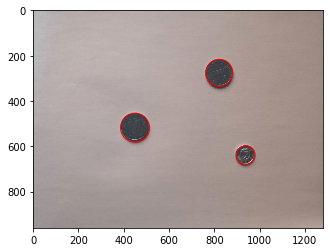

array([[821.5, 275.5,  59.8],
       [449.5, 517.5,  63.9],
       [938.5, 638.5,  41.4]], dtype=float32)

In [9]:
CoinPositioning(img, canny=True)

[[[129.5 156.5 106.2]
  [370.5 155.5 104.9]]]


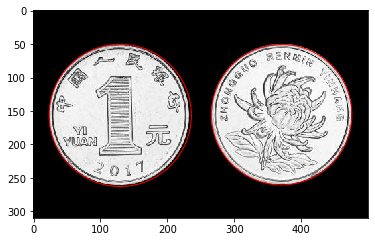

[[[ 81.5  76.5  74.2]
  [ 80.5 238.5  74.8]
  [252.5 236.5  72.6]
  [253.5  76.5  70.7]
  [417.5 238.5  62. ]
  [414.5  78.5  58. ]]]


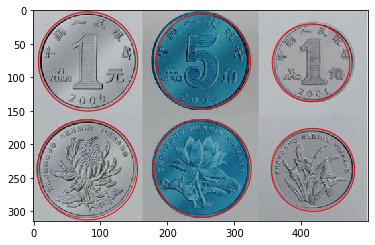

[[[148.5 150.5 144.8]]]


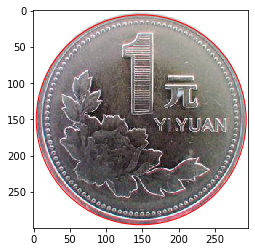

In [10]:
_ = CoinPositioning(cv2.imread("test1.jpg"))
_ = CoinPositioning(cv2.imread("test2.jpg"))
_ = CoinPositioning(cv2.imread("test3.jpg"))

**实现Canny算法/canny.py**

In [11]:
# 预处理，使用特定公式灰度化图片

import matplotlib.image as mpimg

def rgb2gray(rgb):
    r, g, b = rgb[:, :, 0], rgb[:, :, 1], rgb[:, :, 2]
    return 0.2989 * r + 0.5870 * g + 0.1140 * b

imgs = [rgb2gray(mpimg.imread("q.jpg")), rgb2gray(mpimg.imread("test1.jpg"))]

In [12]:
# 输入为灰度图像集，参数有包括高斯核参数、高低阈值等等，输出为边缘集，数量和输入一致
import canny
detector = canny.CannyEdgeDetector(imgs)  # 使用默认参数，未调参
edges = detector.detect()

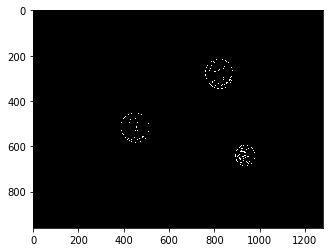

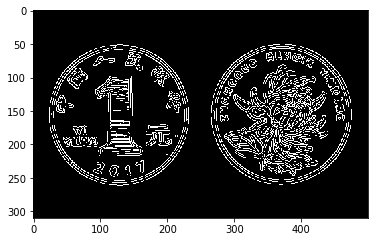

In [13]:
for edge in edges:
    plt.imshow(edge, cmap='gray')
    plt.show()